# Libraries

In [98]:
# libraries
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots



pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Data set

In [68]:
# get dataset
train = pd.read_csv("../data/train.csv", low_memory=False)

display(train.shape)
train.head(5)

(558211, 55)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaN,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,Yes


In [76]:
# change string dates to date type
train['ClaimStartDt'] = pd.to_datetime(train['ClaimStartDt'], format='%Y-%m-%d')
train['ClaimEndDt'] = pd.to_datetime(train['ClaimEndDt'], format='%Y-%m-%d')
train['AdmissionDt'] = pd.to_datetime(train['AdmissionDt'], format='%Y-%m-%d')
train['DischargeDt'] = pd.to_datetime(train['DischargeDt'], format='%Y-%m-%d')
train['DOB'] = pd.to_datetime(train['DOB'], format='%Y-%m-%d')

# Profiling

In [9]:
profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

# EDA

In [55]:
inpatient = train['AdmissionDt'].notnull()
outpatient = train['AdmissionDt'].isna()

How many medical doctors are there in the train outpatient dataset?
How many medical doctors are there in the train inpatient dataset? 
Do they match with those from the outpatient record?

In [28]:
print('Number of total medical doctors: ', 
      train['AttendingPhysician'].nunique())
print('Number of medical doctors in inpatient dataset: ', 
      train[train['AdmissionDt'].notnull()]['AttendingPhysician'].nunique())
print('Number of medical doctors in outpatient dataset: ', 
      train[train['AdmissionDt'].isna()]['AttendingPhysician'].nunique())

Number of total medical doctors:  82063
Number of medical doctors in inpatient dataset:  11604
Number of medical doctors in outpatient dataset:  74109


Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [54]:
print('Number of chronic conditions in inpatient dataset: ', 
      np.sum(train[train['AdmissionDt'].notnull()].filter(regex='ChronicCond').eq(2).sum()))
print('Number of chronic conditions in outpatient dataset: ', 
      np.sum(train[train['AdmissionDt'].isna()].filter(regex='ChronicCond').eq(2).sum()))

Number of chronic conditions in inpatient dataset:  220969
Number of chronic conditions in outpatient dataset:  3408175


How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

In [59]:
print('Number of distinct BeneIDs in inpatient dataset: ', 
      train[inpatient]['BeneID'].nunique())
print('Number of distinct BeneIDs in outpatient dataset: ', 
      train[outpatient]['BeneID'].nunique())

Number of distinct BeneIDs in inpatient dataset:  31289
Number of distinct BeneIDs in outpatient dataset:  133980


Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

In [66]:
train[['AttendingPhysician','Provider']].drop_duplicates(subset=['AttendingPhysician'])['Provider'].value_counts()

PRV52019    643
PRV55215    544
PRV55510    418
PRV57173    303
PRV56268    299
           ... 
PRV51704      1
PRV57024      1
PRV53645      1
PRV56369      1
PRV53228      1
Name: Provider, Length: 5019, dtype: int64

Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

In [67]:
train[['BeneID','Provider']].drop_duplicates(subset=['BeneID'])['Provider'].value_counts()

PRV55215    2580
PRV51459    2153
PRV53797    1654
PRV52649    1395
PRV53918    1340
            ... 
PRV54451       1
PRV55744       1
PRV54546       1
PRV56193       1
PRV55271       1
Name: Provider, Length: 4223, dtype: int64

Do the same providers provide both inpatient and outpatient services? Summarize your finding.

Do some of the same patients receive both inpatient and outpatient services? Summarize your finding.

------------------------------------------------

Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

In [87]:
# adding a column representing the age at the time of service
def f(df):
    age = relativedelta(df['ClaimStartDt'], df['DOB']) 
    return age.years

train['ageAtClaim'] = train.apply(f, axis=1)

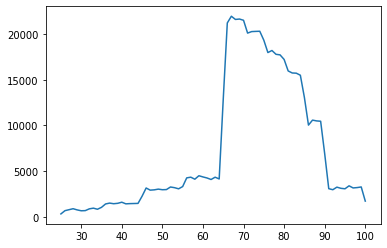

In [94]:
plt.plot(train.groupby(['ageAtClaim'])['ageAtClaim'].count());

Study the relationship between the patient age and their chronic conditions. Within the train-samples, do these chronic conditions show a definite trend with respect to increasing ages?

In [102]:
train[['ChronicCond_Alzheimer', 'ageAtClaim']].groupby(['ageAtClaim']).count()

,ChronicCond_Alzheimer
ageAtClaim,
25,332
26,687
27,794
28,900
29,772
30,676
31,692
32,886
33,962
